# Script containing drawn samples, test statistics, strategy, etc. for project 3

### Facts:
##### $\bullet$ There are 7 nodes 
##### $\bullet$ There is one hidden node
##### $\bullet$ H is a confounder for 2 of the other nodes
##### $\bullet$  The variables that H is a confounder for are NOT directly linked


##### $\bullet$ The file with no intervention 98 samples is called: "data_98_observational.csv" 

## General setup:
### Write down exactly what was done when sampling in a markdown cell above the code
### Do statistics

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from os import listdir
from os.path import isfile, join

import scipy.stats as st

from sklearn.feature_selection import mutual_info_regression as mutual_info


#### Define functions

In [4]:
def load(filename):
    df = pd.read_csv('data/'+str(filename)).iloc[:,1:]
    data = df.to_numpy()
    return data, df
    
def load_as_df(filename):
    df = pd.read_csv('data/'+str(filename))
    df = df.drop(columns=['Unnamed: 0'])
    return df

def mean(A):
    return np.mean(A, axis=0)
def var(A):
    return np.var(A, axis=0)
def corM(df, method):
    return df.corr(method=method)

def ttest(vec1, vec2):
    return st.ttest_rec(vec1,vec2)[1]

In [5]:
a_raw, df_raw = load('data_98_observational.csv')
nodes = df_raw.columns

means = mean(a_raw)
vars = var(a_raw)

#### Load all data
Loads all the data into the dictionary of {filename: dataframe}

In [5]:
# Load all data into dictionary

# List all files in data folder with .csv extension
data_files = [f for f in listdir('data') if isfile(join('data', f)) if f.endswith(".csv")]
# Create dictionary of dataframes 
data_dict = {f[:-4]: load_as_df(f) for f in data_files}

# Suprress seaborn warnings


In [ ]:
data_dict[]

#### Generate plots

Generate scatterlot matrices for all the datasets

In [17]:
# Make all plots
for name, data in data_dict.items():
    sns.set(style="white", palette="muted", color_codes=True)
    g = sns.pairplot(data, kind="scatter",diag_kind="kde")
    g.fig.suptitle("Scatter matrix: " + name, y =1.01)
    g.savefig('plots/scatter_matrix_' + name + '.png')
    # plt.show()
    plt.close()
    print("Created file: " + 'plots/scatter_matrix_' + name + '.png')
    
    

C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_A0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_B0.16.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_B0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_C0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_D0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_D0F0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_E0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_30_F0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Created file: plots/scatter_matrix_data_50_F-0.5.png
Created file: plots/scatter_matrix_data_98_observational.png


Generate correlation matrices for all datafiles

In [18]:
for name, data in data_dict.items():
    # plot correlation matrix
    corr = data.corr()
    plt.figure(figsize=(10,10))
    plt.title('Correlation Matrix')
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu", annot=True)
    plt.savefig('plots/correlation_matrix_' + name + '.png')
    print("Created file: " + 'plots/correlation_matrix_' + name + '.png')

    plt.close()

    # plot spearman correlation matrix
    corr = data.corr(method='spearman')
    plt.figure(figsize=(10,10))
    plt.title('Spearman Correlation Matrix')
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu", annot=True)
    plt.savefig('plots/correlation_matrix_spearman_' + name + '.png')
    print("Created file: " + 'plots/correlation_matrix_spearman_' + name + '.png')

    plt.close()

Created file: plots/correlation_matrix_data_30_A0.png
Created file: plots/correlation_matrix_spearman_data_30_A0.png
Created file: plots/correlation_matrix_data_30_B0.16.png
Created file: plots/correlation_matrix_spearman_data_30_B0.16.png
Created file: plots/correlation_matrix_data_30_B0.png
Created file: plots/correlation_matrix_spearman_data_30_B0.png
Created file: plots/correlation_matrix_data_30_C0.png
Created file: plots/correlation_matrix_spearman_data_30_C0.png
Created file: plots/correlation_matrix_data_30_D0.png
Created file: plots/correlation_matrix_spearman_data_30_D0.png
Created file: plots/correlation_matrix_data_30_D0F0.png
Created file: plots/correlation_matrix_spearman_data_30_D0F0.png
Created file: plots/correlation_matrix_data_30_E0.png
Created file: plots/correlation_matrix_spearman_data_30_E0.png
Created file: plots/correlation_matrix_data_30_F0.png
Created file: plots/correlation_matrix_spearman_data_30_F0.png
Created file: plots/correlation_matrix_data_50_F-0.5.p

In [19]:
for name, data in data_dict.items():
    # Create grid of seaborn plots
    g = sns.PairGrid(data, diag_sharey=True)
    g.map_upper(plt.scatter)
    g.map_lower(sns.kdeplot, cmap="Blues_d")
    g.map_diag(sns.kdeplot, lw=3)
    g.fig.suptitle("KDE Plots: " + name, y =1.01)
    g.savefig('plots/kde_plots_' + name + '.png')

    plt.close()
    print("Created file: " + 'plots/kde_plots_' + name + '.png')
   

C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

Created file: plots/kde_plots_data_30_A0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

Created file: plots/kde_plots_data_30_B0.16.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

Created file: plots/kde_plots_data_30_B0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

Created file: plots/kde_plots_data_30_C0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

Created file: plots/kde_plots_data_30_D0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

Created file: plots/kde_plots_data_30_D0F0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

Created file: plots/kde_plots_data_30_E0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

Created file: plots/kde_plots_data_30_F0.png


C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\andre\anaconda3\envs\signaler-exam\l

Created file: plots/kde_plots_data_50_F-0.5.png
Created file: plots/kde_plots_data_98_observational.png


#### Calculate statistics
Generate latex tables for mean and variance

In [20]:
# Create new empty dataframe
df_means = pd.DataFrame()
df_vars = pd.DataFrame()

for name, data in data_dict.items():
    # Calculate mean and variance of each node
    means = mean(data)
    vars = var(data)

    # add means to dataframe
    df_means[name + '_mean'] = means
    df_vars[name + '_var'] = vars

# Transpose dataframes
df_means = df_means.transpose()
df_vars = df_vars.transpose()

# Generate latex table
df_means.to_latex('tables_latex/means.tex')
df_vars.to_latex('tables_latex/vars.tex')

print(df_means)
print(df_vars)


                                   A         B         C         D         E  \
data_30_A0_mean             0.000000  0.039114 -0.389296  1.312622  0.055963   
data_30_B0.16_mean          1.527638  0.160000 -0.319727  1.778589 -0.013607   
data_30_B0_mean             1.662630  0.000000  0.093494  1.009004  0.073172   
data_30_C0_mean             1.464602  0.000000  0.000000  0.756588 -0.070316   
data_30_D0_mean             1.439067 -1.069356 -0.300000  0.000000  0.000000   
data_30_D0F0_mean           1.800000  0.000000 -0.466667  0.000000  0.000000   
data_30_E0_mean             1.791457 -0.233166 -0.133333  1.096928  0.000000   
data_30_F0_mean             1.866667  0.000000 -0.447329  1.343044  0.047329   
data_50_F-0.5_mean          1.677583 -0.052146 -0.283903  0.934250  0.043903   
data_98_observational_mean  1.492477 -0.183032 -0.388332  1.145678 -0.019831   

                                   F  
data_30_A0_mean            -0.616436  
data_30_B0.16_mean         -0.746649  
da

In [21]:

df_ttest = pd.DataFrame(np.zeros((len(data_dict.keys()),6)))
df_ttest.index = data_dict.keys()
df_ttest.columns = ['A','B','C','D','E','F']

for name, data in data_dict.items():
    # Calculate mean and variance of each node
    # means = mean(data)

    for column in data.columns:
        # print(column)

        p_val = st.ttest_ind(data_dict["data_98_observational"][column],data_dict[name][column]).pvalue
        df_ttest[column][name] = 1 if p_val < 0.05 else 0
        df_ttest[column][name] = p_val

df_ttest.to_latex('tables_latex/p_values.tex')

print(df_ttest)


                                  A         B         C             D  \
data_30_A0             2.794145e-12  0.594539  0.997607  4.758523e-01   
data_30_B0.16          8.738900e-01  0.350310  0.832283  7.245632e-03   
data_30_B0             4.434196e-01  0.617802  0.143413  5.823543e-01   
data_30_C0             8.985550e-01  0.617802  0.172200  1.376787e-01   
data_30_D0             8.124268e-01  0.036820  0.789604  4.074746e-07   
data_30_D0F0           1.590768e-01  0.617802  0.807848  4.074746e-07   
data_30_E0             1.810115e-01  0.907709  0.445299  8.407685e-01   
data_30_F0             8.798551e-02  0.617802  0.858189  4.115108e-01   
data_50_F-0.5          3.039008e-01  0.658314  0.700596  3.063605e-01   
data_98_observational  1.000000e+00  1.000000  1.000000  1.000000e+00   

                              E         F  
data_30_A0             0.065744  0.762543  
data_30_B0.16          0.880723  0.653518  
data_30_B0             0.033085  0.666593  
data_30_C0          

In [29]:
def MI(x,y,plot=False,Nbins=21):
    bins = np.linspace(np.min(x),np.max(x),Nbins)
    eps=np.spacing(1)
    x_marginal = np.histogram(x,bins=bins)[0]
    x_marginal = x_marginal/x_marginal.sum()
    y_marginal = np.array(np.histogram(y,bins=bins)[0])
    y_marginal = y_marginal/y_marginal.sum()
    xy_joint = np.array(np.histogram2d(x,y,bins=(bins,bins))[0])
    xy_joint = xy_joint/xy_joint.sum()
    MI=np.sum(xy_joint*np.log(xy_joint/(x_marginal[:,None]*y_marginal[None,:]+eps)+eps))
    if plot == True:
        plt.figure()
        plt.subplot(1,2,1)
        plt.imshow(xy_joint.T,origin='lower')
        plt.title('joint')
        plt.subplot(1,2,2)
        plt.imshow((x_marginal[:,None]*y_marginal[None,:]).T,origin='lower')
        plt.title('product of marginals')
        plt.suptitle('Mutual information: %f'%MI)
    return(MI)

In [42]:
# http://www.scholarpedia.org/article/Mutual_information
# Mutual information is one of many quantities that measures how much one random variables tells us about another. 
# It is a dimensionless quantity with (generally) units of bits, and can be thought of as the reduction in uncertainty 
# about one random variable given knowledge of another. High mutual information indicates a large reduction in uncertainty; 
# low mutual information indicates a small reduction; and zero mutual information between two random variables means the 
# variables are independent. 


# Generate matrix of mutual information
MI_matrix = pd.DataFrame(np.zeros((6,6)))
MI_matrix.index = ["A", "B", "C", "D", "E", "F"]
MI_matrix.columns = ["A", "B", "C", "D", "E", "F"]

for name, data in data_dict.items():
    # Calculate mean and variance of each node
    # means = mean(data)

    for column in data.columns:
        # print(column)

        for row in data.columns:
            # print(row)
            if column != row:
                MI_matrix[column][row] = MI(data[column],data[row])
            # MI_matrix[column][row] = MI(data_dict[name][column],data_dict[name][row])

        # p_val = st.ttest_ind(data_dict["data_98_observational"][column],data_dict[name][column]).pvalue
        # df_ttest[column][name] = 1 if p_val < 0.05 else 0
        # df_ttest[column][name] = p_val
    
    #Create heatmap with mutual information
    sns.heatmap(MI_matrix, annot=True, fmt='.2f', cmap="YlGnBu")
    plt.savefig('plots/mutual_information_matrix_' + name + '.png')
    plt.close()
    print("Created file: " + 'plots/mutual_information_matrix_' + name + '.png')



<ipython-input-29-c3e06215ee1f>:7: RuntimeWarning: invalid value encountered in true_divide
  y_marginal = y_marginal/y_marginal.sum()
<ipython-input-29-c3e06215ee1f>:9: RuntimeWarning: invalid value encountered in true_divide
  xy_joint = xy_joint/xy_joint.sum()


Created file: plots/mutual_information_matrix_data_30_A0.png
Created file: plots/mutual_information_matrix_data_30_B0.16.png
Created file: plots/mutual_information_matrix_data_30_B0.png
Created file: plots/mutual_information_matrix_data_30_C0.png
Created file: plots/mutual_information_matrix_data_30_D0.png
Created file: plots/mutual_information_matrix_data_30_D0F0.png
Created file: plots/mutual_information_matrix_data_30_E0.png
Created file: plots/mutual_information_matrix_data_30_F0.png
Created file: plots/mutual_information_matrix_data_50_F-0.5.png
Created file: plots/mutual_information_matrix_data_98_observational.png


In [46]:
# create histogram of each node
for name, data in data_dict.items():
    fig, axs = plt.subplots(2, 3, tight_layout=True)
    axs = axs.flatten()
    # set title for plot    
    fig.suptitle("Histograms: " + name, y =1.01)
    for k, column in enumerate(data.columns):

        # print(k, column, data[column])
        # plot 6 histograms in a grid
        # axs[0].hist(data[column], bins=20)
        # plt.figure()
        axs[k].set_title(column)
        axs[k].hist(data[column], bins=10,rwidth=0.9)
        # ax[k].title("Histogram of " + column + " for " + name)

    plt.savefig('plots/hist_' + name + '.jpeg')
    plt.close()
    print("Created file: " + 'plots/hist_' + name + '.jpeg')


Created file: plots/hist_data_30_A0.png
Created file: plots/hist_data_30_B0.16.png
Created file: plots/hist_data_30_B0.png
Created file: plots/hist_data_30_C0.png
Created file: plots/hist_data_30_D0.png
Created file: plots/hist_data_30_D0F0.png
Created file: plots/hist_data_30_E0.png
Created file: plots/hist_data_30_F0.png
Created file: plots/hist_data_50_F-0.5.png
Created file: plots/hist_data_98_observational.png


In [72]:
corM(df_raw, 'spearman')

,A,B,C,D,E,F
A,1.000000,0.074371,0.018483,-0.032101,-0.092886,0.387857
B,0.074371,1.000000,-0.034065,0.167480,-0.024820,0.128793
C,0.018483,-0.034065,1.000000,-0.014594,-0.196654,-0.046280
D,-0.032101,0.167480,-0.014594,1.000000,-0.110163,0.272141
E,-0.092886,-0.024820,-0.196654,-0.110163,1.000000,-0.038005
F,0.387857,0.128793,-0.046280,0.272141,-0.038005,1.000000


In [73]:
df_raw.describe()

,A,B,C,D,E,F
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,1.492477,-0.183032,-0.388332,1.145678,-0.019831,-0.668970
std,1.053181,1.998687,1.544932,1.170557,0.203124,0.781923
min,-0.548616,-7.885692,-2.339222,-1.035836,-0.576186,-2.585362
25%,0.721823,-1.035442,-1.870859,0.285727,-0.122503,-1.243673
50%,0.997897,-0.023420,-0.955102,1.432536,-0.014553,-0.742486
75%,2.598267,0.375455,1.020799,2.108453,0.069367,-0.086572
max,2.999937,10.306302,2.330058,2.721275,0.480917,0.916239


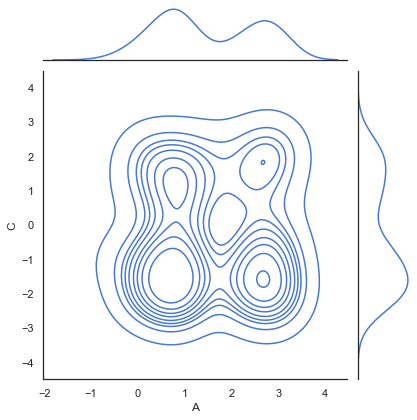

In [104]:
df = df_raw
A = df["A"]
B = df["B"]
C = df["C"]
D = df["D"]
E = df["E"]
F = df["F"]
# sns.jointplot(data={'A':A,'B':B},x='A',y='B',kind='kde')
# sns.jointplot(data={'A':A,'C':C},x='A',y='C',kind='kde')
# sns.jointplot(data={'A':A,'D':D},x='A',y='D',kind='kde')
# sns.jointplot(data={'A':A,'E':E},x='A',y='E',kind='kde')
# sns.jointplot(data={'A':A,'F':F},x='A',y='F',kind='kde')

#sns.jointplot(data={'B':B,'C':C},x='B',y='C',kind='kde')
#sns.jointplot(data={'C':C,'D':D},x='C',y='D',kind='kde')
#sns.jointplot(data={'D':D,'E':E},x='D',y='E',kind='kde')
#sns.jointplot(data={'E':E,'F':F},x='E',y='F',kind='kde')


# Joint plot matrix
# sns.jointplot(data={'A':A,'B':B,'C':C,'D':D,'E':E,'F':F},x='A',y='B',kind='kde')
sns.jointplot(data={'A':A,'B':B,'C':C,'D':D,'E':E,'F':F},x='A',y='C',kind='kde')


In [81]:
a_raw_r = np.round(a_raw,2)

df_raw.cov()

,A,B,C,D,E,F
A,1.109191,0.026320,0.019218,-0.049928,-0.021157,0.240156
B,0.026320,3.994748,-0.111202,0.187797,0.000958,0.002934
C,0.019218,-0.111202,2.386815,-0.003230,-0.009535,-0.019571
D,-0.049928,0.187797,-0.003230,1.370205,-0.024545,0.226815
E,-0.021157,0.000958,-0.009535,-0.024545,0.041259,-0.010216
F,0.240156,0.002934,-0.019571,0.226815,-0.010216,0.611404


In [80]:
p_values = []
for i in range(len(nodes)):
    ttest(a_raw, a_iF)

0.9748022225075905

## Modellering af data - finde den rigtige distribution
Fra denne hjemmeside
https://github.com/mungoliabhishek/Distribution-Fitting-Used_Car_Dataset/blob/master/Workbook.ipynb

In [3]:
from sklearn.preprocessing import StandardScaler
import re
import pandas as pd
import numpy as np
# from mlutils import dataset, connector
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm 
import seaborn as sns
import pylab as py 
warnings.filterwarnings('ignore')
%matplotlib inline


NameError: name 'df_raw' is not defined

In [7]:
df = df_raw

In [9]:
def standarise(column,pct,pct_lower):
    sc = StandardScaler() 
    y = df[column][df[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [6]:
def fit_distribution(column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [10]:
fit_distribution('E',0.99,0.01)

(0.7835998781753788, -2.8037639857428363, 1.2688459577488853)

(4.578239276804769e-18, 1.0)

(3.34275393942044, 3.0817511571641143, 3.4258776692884134)

(6660147.59188441, 323.8363892441532, -369947.1998324774, 369965.19042919925)

(0.01155162155329353, -9.768837071525049, 845.7211619523314)

(-2.803763985742836, 5.218229054368242)

(806.7094684529852, -28.43917784681358, 0.035250096149845034)

(-2.803763985742836, 2.803763985742836)

(0.005649094234636606, -176.51938076287897, 176.51609347708734)

(-0.0801358519651702, 4.430379058275035e-18, 0.9998053232542057)

(0.5429917921777829, -2.9108956251679485, 5.49358159865754)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
3          beta         7.0
1          norm         8.0
6         gamma         8.0
8       lognorm         8.0
9      pearson3         8.0
2   weibull_max         9.0
4      invgauss        11.0
10       triang        18.0
5       uniform        73.0
